In [ ]:
# This Python notebook contains step up guide to extract and analyse Flickr metadata related to whale watching photographs in Sri Lanka

In [2]:
#importing flickr api to get the data and json to read javascript notion 
import flickrapi
import json

In [3]:
#access to the flicker by using API
api_key="********************"
api_secret="************"
#create and instance for flickr api client
flickr = flickrapi.FlickrAPI(api_key,api_secret,format='parsed-json')

In [4]:
#Searching flicker photos only for sri lanka (for searching other place id go for https://www.flickr.com/services/api/explore/flickr.places.getInfo )
# this has problems as geocoded/boundary box search only results 250 per page, iteration also can't help as server is crying. have to obtain results page by page..
photos = flickr.photos.search(text="whale",
                              has_geo=1,
                              page=1,
                              content_type=1,
                              extras='geo, date_taken,url_m',
                              place_id="Gdm6XV1TUb52hMbKtA")
#photos                              

In [5]:
# photos in json file format.
# photos

In [6]:
#obtaining the results in second page
photos1 = flickr.photos.search(text="whale",
                              has_geo=1,
                              page=2,
                              content_type=1,
                              extras='geo, date_taken,url_m',
                              place_id="Gdm6XV1TUb52hMbKtA")

In [7]:
#Visualizing the photographs in html format
#from IPython.core.display import display, HTML
#for i in photos['photos']['photo']:
     #display(HTML("<img src='%s'>"%(i['url_m'])))
     #display(i['url_m'])
#for i in photos1['photos']['photo']:
    #display(HTML("<img src='%s'>"%(i['url_m'])))
    #display(i['url_m'])

In [6]:
# attempt to merge these two dictionaries together after removing {'photos': {'page': 2,'pages': 2,'perpage': 250, 'total': '469'},
#'stat': 'ok'} in each page. List manipulation of dictionaries attempted.

In [8]:
A=photos['photos']['photo']+photos1['photos']['photo']
#A

In [9]:
data=[]
for photo in A:
    #photo_data=flickr.photos.getInfo(photo_id=photo["id"]
    #url="https://farm%s.staticflickr.com/%s/%s_%s_s.jpg"%(photo["farm"],photo["server"],photo["id"],photo["secret"])
    data.append({"id":photo["id"],
                 "owner":photo["owner"],
                 "Period":photo["datetaken"][:10],
                 "time":str(photo["datetaken"][10:]),
                 "title":photo["title"],
                 "latitude":photo["latitude"],
                 "longitude":photo["longitude"],
                 "title":photo["title"],
                 "URL":photo["url_m"]})
        
         

In [10]:
# data

In [11]:
#convert data dictionary into dataframe
import pandas as pd
data=pd.DataFrame(data)

In [12]:
#increasing the lenght of screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
#convert period string to date time numerics and splitting into date,month and year
import pandas as pd
data["Period"]=pd.to_datetime(data['Period'])
data
data['Year'] = data['Period'].dt.year
data['Month'] =data['Period'].dt.month
data['date'] = data['Period'].dt.day
data['ownerid']=data.owner.str[:8]
data['timehour']=data.time.str[:3]
#data

In [13]:
#no of photographers who photographed the whales
#obtainting the number of photographers who photographed the whales
photographers_count=data['owner'].drop_duplicates().count()
photographers_count

93

In [15]:
# This is an attempt to obtain the sightings of animals by photographers
# duplicates are removed as follows. [same lat. & longitude. & same date and time]
sightings=data.drop_duplicates(['latitude','longitude','period'])
sightings['latitude']=sightings.latitude.astype(float)
sightings['longitude']=sightings.longitude.astype(float)
sightings.sort_values("latitude")
sightings.reset_index(drop=True) # drop True delete old index which added as a column by default

c:\users\tharindu\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\tharindu\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Period,URL,id,latitude,longitude,owner,time,title,Year,Month,date,ownerid,timehour
0,2018-03-25,https://farm1.staticflickr.com/801/40611168584...,40611168584,5.702901,80.742645,60622074@N04,12:28:53,Blue Whale 4a,2018,3,25,60622074,12
1,2018-02-25,https://farm5.staticflickr.com/4773/4007493619...,40074936195,6.038437,80.198950,43981090@N04,11:03:47,Whale watching boat returning to harbour,2018,2,25,43981090,11
2,2018-01-29,https://farm5.staticflickr.com/4743/3949469113...,39494691134,5.787708,80.389022,13792605@N05,08:54:42,On the tail of the blue whale,2018,1,29,13792605,08
3,2017-12-26,https://farm5.staticflickr.com/4603/2788633899...,27886338999,5.947570,80.451153,13408725@N03,11:18:29,Sri_Lanka_17_352,2017,12,26,13408725,11
4,2017-12-26,https://farm5.staticflickr.com/4715/3876808704...,38768087045,5.829572,80.450477,13408725@N03,09:25:29,Sri_Lanka_17_348,2017,12,26,13408725,09
5,2017-08-15,https://farm5.staticflickr.com/4387/3664392884...,36643928844,5.928618,80.408377,7415626@N04,05:07:55,Whale Tail,2017,8,15,7415626@,05
6,2016-04-03,https://farm2.staticflickr.com/1695/2666418783...,26664187836,8.703171,81.407318,91101191@N03,10:05:33,Sperm whale starting a dive #2,2016,4,3,91101191,10
7,2014-04-14,https://farm8.staticflickr.com/7314/1398031011...,13980310113,5.887382,80.395889,35178699@N03,04:43:43,Blue Whale / Remora,2014,4,14,35178699,04
8,2014-01-06,https://farm4.staticflickr.com/3788/1351718273...,13517182735,5.948296,80.449833,44160799@N06,02:10:38,"2014_01_06_01 Mirissa, Harbour P1030494",2014,1,6,44160799,02
9,2013-11-03,https://farm4.staticflickr.com/3680/1064491881...,10644918814,6.033199,80.218200,34665545@N05,12:56:18,On Full Swing,2013,11,3,34665545,12


In [16]:
# This section should run after look through the map; idea is to delete rows that are not matching (e.g. item's in inland)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.height', 1500)
to_drop = [7.291809, 7.605851,7.665399, 7.927314,7.87395,5.94296,5.958924,5.971387,5.976367,5.966388,5.956363,6.03636,]
sightings_dropped=sightings[~sightings['latitude'].isin(to_drop)]
sightings_dropped


,Period,URL,id,latitude,longitude,owner,time,title,Year,Month,date,ownerid,timehour
0,2018-03-25,https://farm1.staticflickr.com/801/40611168584_7237157a43.jpg,40611168584,5.702901,80.742645,60622074@N04,12:28:53,Blue Whale 4a,2018,3,25,60622074,12
5,2018-02-25,https://farm5.staticflickr.com/4773/40074936195_e9f752d148.jpg,40074936195,6.038437,80.198950,43981090@N04,11:03:47,Whale watching boat returning to harbour,2018,2,25,43981090,11
6,2018-01-29,https://farm5.staticflickr.com/4743/39494691134_9101f523a8.jpg,39494691134,5.787708,80.389022,13792605@N05,08:54:42,On the tail of the blue whale,2018,1,29,13792605,08
7,2017-12-26,https://farm5.staticflickr.com/4603/27886338999_ef25f43ab8.jpg,27886338999,5.947570,80.451153,13408725@N03,11:18:29,Sri_Lanka_17_352,2017,12,26,13408725,11
8,2017-12-26,https://farm5.staticflickr.com/4715/38768087045_bf49129699.jpg,38768087045,5.829572,80.450477,13408725@N03,09:25:29,Sri_Lanka_17_348,2017,12,26,13408725,09
13,2017-08-15,https://farm5.staticflickr.com/4387/36643928844_20f187c607.jpg,36643928844,5.928618,80.408377,7415626@N04,05:07:55,Whale Tail,2017,8,15,7415626@,05
14,2016-04-03,https://farm2.staticflickr.com/1695/26664187836_aa51286037.jpg,26664187836,8.703171,81.407318,91101191@N03,10:05:33,Sperm whale starting a dive #2,2016,4,3,91101191,10
18,2014-04-14,https://farm8.staticflickr.com/7314/13980310113_338606fa6c.jpg,13980310113,5.887382,80.395889,35178699@N03,04:43:43,Blue Whale / Remora,2014,4,14,35178699,04
19,2014-01-06,https://farm4.staticflickr.com/3788/13517182735_6e0560ca7f.jpg,13517182735,5.948296,80.449833,44160799@N06,02:10:38,"2014_01_06_01 Mirissa, Harbour P1030494",2014,1,6,44160799,02
20,2013-11-03,https://farm4.staticflickr.com/3680/10644918814_8bef11fd54.jpg,10644918814,6.033199,80.218200,34665545@N05,12:56:18,On Full Swing,2013,11,3,34665545,12


In [14]:
#sightings_dropped.URL

In [17]:
# from IPython.core.display import display, HTML
# from PIL import Image
# import requests
# for i in sightings_dropped:
#     im = Image.open(requests.get(sightings_dropped["URL"][1:20], stream=True).raw)   
#from IPython.core.display import display, HTML
# for i in photos1:
#     print(i)
#     display(HTML("<img src='%s'>"%(i["url"])))
#     Image(filename=str(i["url"]))
#photos1

In [18]:
#mapping into folium map
import folium
from folium import plugins
from folium.plugins import HeatMap
import numpy as np
sightings_dropped_map=folium.Map(
            location=[7.8731, 80.7718],
            zoom_start=12,
            max_zoom=50,
            tiles='cartodbpositron')
for index,row in sightings_dropped.iterrows():
    folium.CircleMarker([(row['latitude']),
                         (row["longitude"])],
                        radius=6,color='red',
                        weight=0.5,fill_color='red',
                        popup=row['URL'],
                        fill_opacity=0.2,fill=True).add_to(sightings_dropped_map)
sightings_dropped_map
#plotting concentrated places for heatmap
sightings_dropped['Latitude'] = sightings_dropped['latitude'].astype(float)
sightings_dropped['Longitude'] = sightings_dropped['longitude'].astype(float)
heat_data = [[row['Latitude'],row['Longitude']] for index, row in sightings_dropped.iterrows()]
HeatMap(heat_data).add_to(sightings_dropped_map)
sightings_dropped_map


c:\users\tharindu\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\tharindu\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


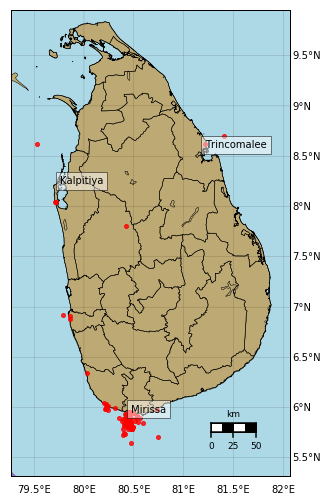

In [19]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.figure(figsize=(5,10))
map = Basemap(projection = 'merc',  resolution = 'h',area_thresh = 0.5, llcrnrlon=79.2643, llcrnrlat=5.3135, urcrnrlon=82.0658, urcrnrlat=9.951)
map.drawcoastlines(linewidth=0.5)
map.drawcountries(linewidth=0.5)
map.fillcontinents(color='#bda973',lake_color='#bda973')
map.drawmapboundary(fill_color = 'lightblue')
map.drawmeridians(np.arange(0, 360, 0.5), labels=[False, False, False, True], linewidth=0.2)
map.drawparallels(np.arange(-90, 90, 0.5), labels=[False, True, False, False], linewidth=0.2)
#Read district boundaries.
#sh_info=map.readshapefile('C:\\Users\\Tharindu\\Downloads\\species_13143\\species_13143',"areas",color='blue')
shp_info = map.readshapefile('C:\\Users\\Tharindu\\downloads\\Compressed\\LKA_adm1',"areas")
for index,row in sightings_dropped.iterrows():
    x,y = map(row['longitude'], row['latitude'])
    map.plot(x, y, 'red', markersize=4, alpha=0.8,marker='o',markeredgecolor='red')
map.drawmapscale(81.5, 5.8, 80.5, 6, 50,barstyle='fancy') 
x,y=map(80.471587,5.948262) # Mirissa
x2,y2=map(81.215212,8.587364) # Trincomalee
x3,y3=map(79.759614,8.229528) # Kalpitiya
plt.text(x,y, "Mirissa",fontsize=10,bbox=dict(facecolor='w', alpha=0.5))
plt.text(x2,y2, "Trincomalee",fontsize=10,bbox=dict(facecolor='w', alpha=0.5))
plt.text(x3,y3, "Kalpitiya",fontsize=10,bbox=dict(facecolor='w', alpha=0.5))
map.scatter(80.471587,5.948262,latlon=False,marker='D')
plt.savefig('myfig.png',dpi=800)
plt.show() 

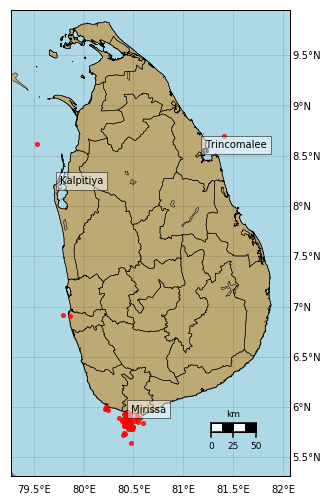

In [18]:
#Above code is based on dataframe values which are automatically generated. However, we have to filter that, we use filtered excel file to map in this sense.
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.figure(figsize=(5,10))
map = Basemap(projection = 'merc',  resolution = 'h',area_thresh = 0.5, llcrnrlon=79.2643, llcrnrlat=5.3135, urcrnrlon=82.0658, urcrnrlat=9.951)
map.drawcoastlines(linewidth=0.5)
map.drawcountries(linewidth=0.5)
map.fillcontinents(color='#bda973',lake_color='#bda973')
map.drawmapboundary(fill_color = 'lightblue')
map.drawmeridians(np.arange(0, 360, 0.5), labels=[False, False, False, True], linewidth=0.2)
map.drawparallels(np.arange(-90, 90, 0.5), labels=[False, True, False, False], linewidth=0.2)
#Read district boundaries.
#sh_info=map.readshapefile('C:\\Users\\Tharindu\\Downloads\\species_13143\\species_13143',"areas",color='blue')
shp_info = map.readshapefile('C:\\Users\\Tharindu\\downloads\\Compressed\\LKA_adm1',"areas")
cleaned=pd.read_csv("C:\\Users\\Tharindu\\Desktop\\NSF_geo_coding\\cleaned_whale_sightings.csv")
for index,row in cleaned.iterrows():
    x,y = map(row['longitude'], row['latitude'])
    map.plot(x, y, 'red', markersize=4, alpha=0.8,marker='o',markeredgecolor='red')
map.drawmapscale(81.5, 5.8, 80.5, 6, 50,barstyle='fancy') 
x,y=map(80.471587,5.948262) # Mirissa
x2,y2=map(81.215212,8.587364) # Trincomalee
x3,y3=map(79.759614,8.229528) # Kalpitiya
plt.text(x,y, "Mirissa",fontsize=10,bbox=dict(facecolor='w', alpha=0.5))
plt.text(x2,y2, "Trincomalee",fontsize=10,bbox=dict(facecolor='w', alpha=0.5))
plt.text(x3,y3, "Kalpitiya",fontsize=10,bbox=dict(facecolor='w', alpha=0.5))
map.scatter(80.471587,5.948262,latlon=False,marker='D')
plt.savefig('myfig.png',dpi=800)
plt.show() 

In [20]:
#zoomed map
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.figure(figsize=(5,5))
map = Basemap(projection = 'merc',  resolution = 'h',area_thresh = 0.9, llcrnrlon=80.1412, llcrnrlat=5.6756, urcrnrlon=80.8031, urcrnrlat=6.1919)
map.drawcoastlines(linewidth=0.5)
map.drawcountries(linewidth=0.5)
map.fillcontinents(color='#bda973')
map.drawmapboundary(fill_color = 'lightblue')
map.drawmeridians(np.arange(0, 360, 0.125), labels=[False, False, False, True], linewidth=0.3,color='k')
map.drawparallels(np.arange(-90, 90, 0.125), labels=[False, True, False, False], linewidth=0.3,color='k')
map.drawrivers ( color = 'w' )
#Read district boundaries.
#sh_info=map.readshapefile('C:\\Users\\Tharindu\\Downloads\\species_13143\\species_13143',"areas",color='blue')
shp_info = map.readshapefile('C:\\Users\\Tharindu\\downloads\\Compressed\\LKA_adm1',"areas")
cleaned=pd.read_csv("C:\\Users\\Tharindu\\Desktop\\NSF_geo_coding\\cleaned_whale_sightings.csv")
cleaned
for index,row in cleaned.iterrows():
    x,y = map(row['longitude'], row['latitude'])
    map.plot(x, y, 'red', markersize=3, alpha=0.5,marker='o',markeredgecolor='red')
map.drawmapscale(80.625, 5.75, 80.625, 5.75, 25, barstyle='fancy')
x,y=map(80.471587,5.948262)
x2,y2=map(80.220977,6.053519)
plt.text(x,y, "Mirissa",fontsize=10,bbox=dict(facecolor='w', alpha=0.5))
plt.text(x2,y2, "Galle",fontsize=10,bbox=dict(facecolor='w', alpha=0.5))
plt.savefig('myfig_zoom.png',dpi=800)
plt.show()

FileNotFoundError: File b'C:\\Users\\Tharindu\\Desktop\\NSF_geo_coding\\cleaned_whale_sightings.csv' does not exist

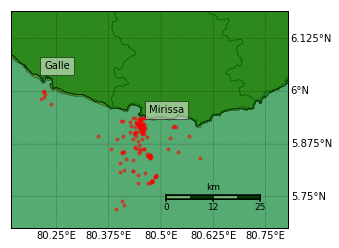

In [13]:
#mapping data with IUCN species distribution data
# This overlay species distribution for our map; problem is since bluewhale distribution is in ocean
# we couldn't expect better results; as a result whole sea area will be selected
# however, this method can be used for other terrestial species
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection # To add shape file patches to the map
from matplotlib.patches import PathPatch
import numpy as np
import pandas as pd
fig     = plt.figure()
ax      = fig.add_subplot(111)
map = Basemap(projection = 'merc',  resolution = 'h',area_thresh = 0.9, llcrnrlon=80.1412, llcrnrlat=5.6756, urcrnrlon=80.8031, urcrnrlat=6.1919)
map.drawcoastlines(linewidth=0.5)
map.drawcountries(linewidth=0.5)
map.fillcontinents(color='#bda973')
map.drawmapboundary(fill_color = 'lightblue')
map.drawmeridians(np.arange(0, 360, 0.125), labels=[False, False, False, True], linewidth=0.3,color='k')
map.drawparallels(np.arange(-90, 90, 0.125), labels=[False, True, False, False], linewidth=0.3,color='k')
map.drawrivers ( color = 'w' )
shp_info = map.readshapefile('C:\\Users\\Tharindu\\downloads\\Compressed\\LKA_adm1',"areas")
# Reading the IUCN Shappe file
whale_shape = map.readshapefile('C:\\Users\\Tharindu\\Desktop\\NSF_geo_coding\\species_2477\\species_2477',"whale")
# Filling the polygons in shape file
patches   = []
patches = [Polygon(np.array(shape), True) for info, shape in zip(map.whale_info, map.whale)]
ax.add_collection(PatchCollection(patches, facecolor= 'green', edgecolor='k', linewidths=1., zorder=2,alpha=0.5))
cleaned=pd.read_csv("C:\\Users\\Tharindu\\Desktop\\NSF_geo_coding\\cleaned_whale_sightings.csv")
cleaned
for index,row in cleaned.iterrows():
    x,y = map(row['longitude'], row['latitude'])
    map.plot(x, y, 'red', markersize=3, alpha=0.5,marker='o',markeredgecolor='red')
map.drawmapscale(80.625, 5.75, 80.625, 5.75, 25, barstyle='fancy')
x,y=map(80.471587,5.948262)
x2,y2=map(80.220977,6.053519)
plt.text(x,y, "Mirissa",fontsize=10,bbox=dict(facecolor='w', alpha=0.5))
plt.text(x2,y2, "Galle",fontsize=10,bbox=dict(facecolor='w', alpha=0.5))
plt.show()


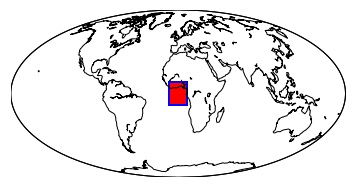

In [65]:
from matplotlib.patches import Polygon 
import matplotlib.pyplot as plt 
from mpl_toolkits.basemap import Basemap 
map = Basemap(projection='moll',lon_0=0) 
x1,y1 = map(-10,-10) 
x2,y2 = map(-10,10) 
x3,y3 = map(10,10) 
x4,y4 = map(10,-10) 
p = Polygon([(x1,y1),(x2,y2),(x3,y3),(x4,y4)], 
    facecolor='red',edgecolor='blue',linewidth=2) 
plt.gca().add_patch(p) 
map.drawcoastlines() 
map.drawmapboundary() 
plt.show() 

In [19]:
# #Distribution of whales according to SL NAVY
# from mpl_toolkits.basemap import Basemap
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# plt.figure(figsize=(5,10))
# map = Basemap(projection = 'merc',  resolution = 'f',area_thresh = 0.5, llcrnrlon=79.2643, llcrnrlat=5.3135, urcrnrlon=82.0658, urcrnrlat=9.951)
# map.drawcoastlines(linewidth=0.5)
# map.drawcountries(linewidth=0.5)
# map.fillcontinents(alpha=0.5)
# map.drawmapboundary()
# map.drawmeridians(np.arange(0, 360, 0.5), labels=[False, False, False, True], linewidth=0.1,)
# map.drawparallels(np.arange(-90, 90, 0.5), labels=[False, True, False, False], linewidth=0.1)
# #Read district boundaries.
# # shp_info = map.readshapefile('C:\\Users\\Tharindu\\downloads\\Compressed\\LKA_adm1',"areas")
# NAVY_data=pd.read_csv("C:\\Users\\Tharindu\\Desktop\\NSF_geo_coding\\WHALE_NAVY_2.csv")
# #NAVY_data
# for index,row in NAVY_data.iterrows():
#     x,y = map(row['DEC_long'], row['DEC_lat'])
#     map.plot(x, y, 'green', markersize=3, alpha=0.8,marker='o',markeredgecolor='black')
# # plt.savefig('Navy_whales.png',dpi=800)
# # map.drawmapscale(81.5, 5.8, 80.5, 6, 50)
# plt.show()
# # NAVY_data

In [54]:
# from bs4 import BeautifulSoup
# import requests 
# r  = requests.get("http://whalewatching.navy.lk/index.php?id=25")
# print(r.text)
# soup = BeautifulSoup(r.text, "html5lib")
# table_wrapper=soup.find("div", {"id": "tableborder"})
# tables=table_wrapper.findAll("table")
# rel_table=tables[1]
# data_set=[]
# 
# rows=rel_table.findAll('tr')
# rows=rows[1:]
# print(rows)
# for row in rows:
#     tds=row.findAll("td")
#     for td in tds:
#         print(td.text)
#         data_set.append(str(td.text))



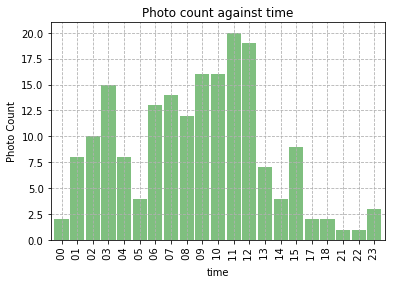

In [22]:
#plotting photo count against the time
import matplotlib.pyplot as plt
plt.style.use('seaborn-muted')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
D=sightings_dropped.groupby(sightings_dropped["timehour"]).count()
D.plot.bar(width=0.9,legend=False,color='green',alpha=0.5)
plt.grid(ls='dashed',zorder=0)
#plt.bar(data["Month"],data["Month"].groupby(data["Month"]).count(),color='green',alpha=0.5)
plt.xticks(rotation=90)
plt.xlabel("time")
plt.ylabel("Photo Count")
plt.title("Photo count against time")
#plt.savefig('RCA.png', dpi = 800)
plt.show()

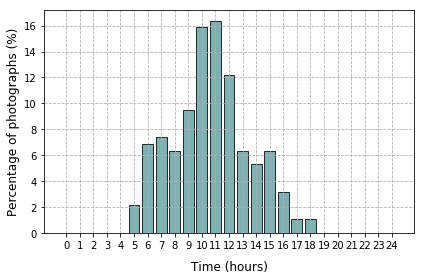

In [62]:
time_frame = pd.read_csv('C:\\Users\\Tharindu\\Desktop\\NSF_geo_coding\\timeframe.csv')
import matplotlib.pyplot as plt
plt.style.use('seaborn-muted')
import numpy as np
import pandas as pd
plt.bar(time_frame["Hour"],time_frame["Frequency"],width=0.8,alpha=0.8,color='cadetblue',edgecolor='black')
plt.grid(ls='dashed',zorder=0)
plt.xticks(time_frame.index, time_frame['Hour'],rotation=0,fontsize=10)
plt.xlabel("Time (hours)",fontsize=12,labelpad = 10)
plt.ylabel("Percentage of photographs (%)",fontsize=12)
plt.tight_layout()
plt.savefig('time_frame.jpeg', dpi = 800)
plt.show()

In [101]:
#get a list of machine tags for each photo.
# result_list_tag = []
# for idx, photo_id in data['id'].iteritems():
#         result_list_tag.append(pd.read_json(json.dumps(flickr.tags.getListPhoto(photo_id=id)),orient=list))
# result_list_tag

In [102]:
#result_list_tag

In [18]:
#dictionary method
result_dict_tag = {}
for idx, photo_id in sightings_dropped['id'].iteritems():
        result_dict_tag[photo_id] = flickr.tags.getListPhoto(photo_id=photo_id)
        #print(photo_id)
#result_dict_tag


NameError: name 'sightings_dropped' is not defined

In [59]:
raw_words = [result_dict_tag[i]['photo']["tags"]['tag'][k]['raw']
               for i in result_dict_tag 
               for k in range(len(result_dict_tag[i]['photo']["tags"]['tag']))]
#raw_words            
      

In [60]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
list=[element.lower() for element in raw_words];list
counts = Counter(list)
#counts

In [61]:
 string=" ".join(str(x) for x in raw_words)

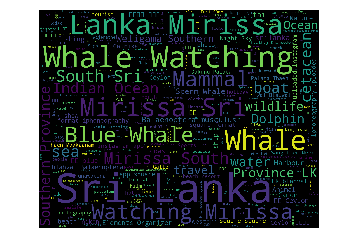

In [62]:
from wordcloud import WordCloud
wordcloud = WordCloud(
     #font_path='Xerox Sans Serif Wide Bold Oblique.ttf',
     #stopwords=STOPWORDS.union(stopwords),
     background_color='black',
     #mask = logomask,
     max_words=1500,
     width=1800,
     height=1400
 ).generate(string)
plt.imshow(wordcloud.recolor())
plt.axis('off')
plt.show()

In [72]:
# classification of the tags based on k-means clustering
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans
# from sklearn.metrics import adjusted_rand_score
# from sklearn.decomposition import PCA
# raw_words
# vectorizing the text
# vectorizer = TfidfVectorizer(stop_words='english')
# X = vectorizer.fit_transform(raw_words)
# true_k = 3
# model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
# model.fit(X)
# model.labels_
# print("Top terms per cluster:")
# order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names()
# for i in range(true_k):
#      print ("Cluster %d:" % i),
# for ind in order_centroids[i, :10]:
#     print (' %s' % terms[ind]),
#     print()


In [ ]:
import numpy as np
import sklearn.cluster
import distance

words = "YOUR WORDS HERE".split(" ") #Replace this line
words = np.asarray(words) #So that indexing with a list will work
lev_similarity = -1*np.array([[distance.levenshtein(w1,w2) for w1 in words] for w2 in words])

affprop = sklearn.cluster.AffinityPropagation(affinity="precomputed", damping=0.5)
affprop.fit(lev_similarity)
for cluster_id in np.unique(affprop.labels_):
    exemplar = words[affprop.cluster_centers_indices_[cluster_id]]
    cluster = np.unique(words[np.nonzero(affprop.labels_==cluster_id)])
    cluster_str = ", ".join(cluster)
    print(" - *%s:* %s" % (exemplar, cluster_str))

In [94]:
# from collections import Counter
# counts=Counter(raw_words)
# tag_words=counts.keys()
# tag_frequency=counts.values()
# indexes = np.arange(len(tag_words))
# width = 0.7
# plt.bar(indexes, tag_frequency, width)
# plt.xticks(indexes + width * 0.5, tag_words)
# plt.show()

In [165]:
#------------------------feeding the user ids to get information about the user locations by using list method---------------------------------
import json 
result_list = []
for idx,owner in sightings_dropped['owner'].iteritems():
     result_list.append(pd.read_json(json.dumps(flickr.people.getInfo(user_id=owner)),orient=list))
#result_list

In [166]:
#result_list

In [167]:
df = pd.concat(result_list, axis=1).transpose()
df=df[["username","location"]]
B=df.reset_index()
B=df.drop(df.index[1]).reset_index()
B=pd.DataFrame(B)
#B


In [168]:
import numpy as np
pd.set_option('display.max_rows', 500)
C=pd.DataFrame(B['username'].apply(pd.Series))
C.rename(columns={"_content":"Name"},inplace=True)
D=pd.DataFrame(B['location'].apply(pd.Series))
D.rename(columns={"_content":"location"},inplace=True)
E=pd.merge(C, D, left_index=True, right_index=True)
#E=E[["Name","location"]]
#E['location'].replace('NaN', np.nan, inplace=True)
#E.drop_duplicates('Name')

c:\users\tharindu\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\indexes\api.py:57: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  union = _union_indexes(indexes)
c:\users\tharindu\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\indexes\api.py:87: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


In [169]:
# This has to be fine tuned again...locations has to aggregate.

#E.groupby('location').count()

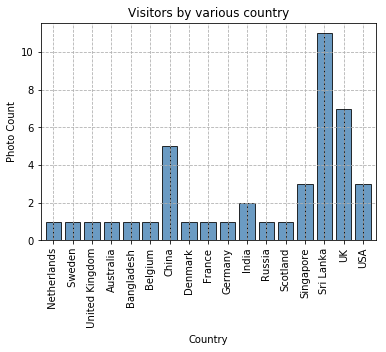

In [203]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-muted')
import numpy as np
import pandas as pd
visitor_info = pd.read_csv('C:\\Users\\Tharindu\\Desktop\\NSF_geo_coding\\Visitor_country.csv')
F=visitor_info.groupby(visitor_info["location"]).count()
F.plot.bar(width=0.8,legend=False,color='steelblue',alpha=0.8,edgecolor='black')
plt.grid(ls='dashed',zorder=0)
#plt.bar(data["Month"],data["Month"].groupby(data["Month"]).count(),color='green',alpha=0.5)
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Photo Count")
plt.title("Visitors by various country")
plt.savefig('vistior_distribution.jpeg', dpi = 800)
plt.show()

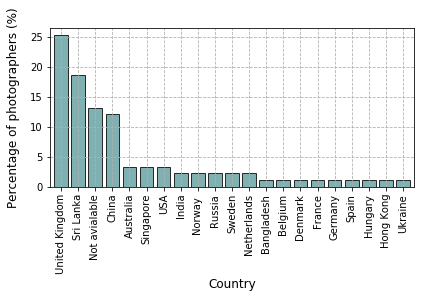

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
visitor_info = pd.read_csv('C:\\Users\\Tharindu\\Desktop\\Research\\NSF_geo_coding\\summary_visit_country.csv')
visitor_info.sort_values(by="Percentage",inplace=True, ascending=False)
ax = visitor_info.plot(y='Percentage', kind='bar',alpha=0.8,width=0.8,color='cadetblue',edgecolor='black')
plt.grid(ls='dashed',zorder=0)
ax.set_xticklabels(visitor_info['Country'])
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=12)
plt.ylabel("Percentage of photographers (%)",fontsize=12,labelpad = 10)
ax.legend_.remove()
plt.tight_layout()
plt.savefig('visitor_count_by_percentage.jpeg', dpi = 800)
plt.show()

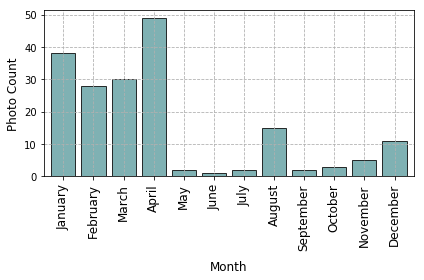

In [199]:
#plotting the results no of photos taken against month
import matplotlib.pyplot as plt
plt.style.use('seaborn-muted')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
data1=sightings_dropped["Month"].groupby(data["Month"]).count()
data1.plot.bar(width=0.8,alpha=0.8,color='cadetblue',edgecolor='black')
plt.grid(ls='dashed',zorder=0)
#plt.bar(data["Month"],data["Month"].groupby(data["Month"]).count(),color='green',alpha=0.5)
plt.xticks(rotation=0)
plt.xlabel("Month",fontsize=12,labelpad = 10)
plt.ylabel("Photo Count",fontsize=12)
N=12
ind=np.arange(12)
plt.xticks(ind, ("January","February","March","April","May","June","July","August","September","October","November","December"),rotation=90,fontsize=12)
plt.tight_layout()
plt.savefig('photo_count.jpeg', dpi = 800)
plt.show()

In [22]:
#------------------------feeding the photo ids to get exif information about the cameras by using list method---------------------------------
import json 
result_list_exif = []
for idx,id in sightings_dropped['id'].iteritems():
    #print(id)
    try:
        result_list_exif.append(pd.read_json(json.dumps(flickr.photos.getExif(photo_id=id)),orient=list))
    except Exception:
        pass 
#     result_list_exif.append(pd.read_json(json.dumps(flickr.photos.getExif(photo_id=id)),orient=list))
    
#result_list_exif
    


NameError: name 'sightings_dropped' is not defined

In [20]:
#result_list_E = pd.concat(result_list_exif, axis=1).transpose()
#result_list_E.drop('stat')
#Exif_dataframe=pd.DataFrame(result_list_E.groupby('camera').count()['exif']).reset_index()
#Exif_dataframe


In [21]:
#checking available fonts
import matplotlib.font_manager
#matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

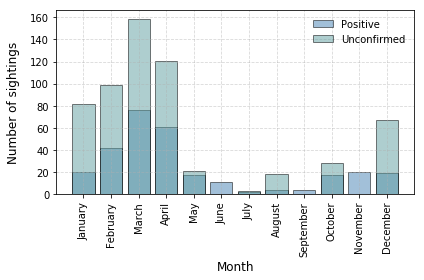

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import nan # to handle the Nan
Positive=(20.289,41.7391,75.942,60.8696,16.8116,11.0145,1.73913,4.05797,4.05797,16.8116,20.2899,19.1304)
Unconfirmed=(81.7391,99.1304,158.84,120.58,20.8696,nan,2.89855,18.5507,nan,27.8261,nan,66.6667)
ind = np.arange(12)
plt.grid(ls='dashed',zorder=5,alpha=0.5)
Month=("January","February","March","April","May","June","July","August","September","October","November","December")
a=plt.bar(ind,Positive,edgecolor='black',alpha=0.5,width=0.8,color='steelblue')
b=plt.bar(ind,Unconfirmed,edgecolor='black',alpha=0.5,width=0.8, color='cadetblue')
plt.xlabel("Month",fontsize=12)
plt.ylabel("Number of sightings",fontsize=12,labelpad = 10)
plt.xticks(ind, (Month),rotation=90)
plt.legend((a[0], b[0]), ('Positive', 'Unconfirmed'),frameon=False,loc="upper right")
plt.tight_layout()
plt.savefig('mat_df.jpg', dpi = 800)
plt.show()


In [32]:
#http://flickr.com/photo.gne?id=  use to retrieve photos from flickr
#2177060015_258bcfaff9_m first part is id